In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/try-try-try/final_ct.csv


# Importing libraries + Datset + Variable identification and typecasting.


In [58]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings

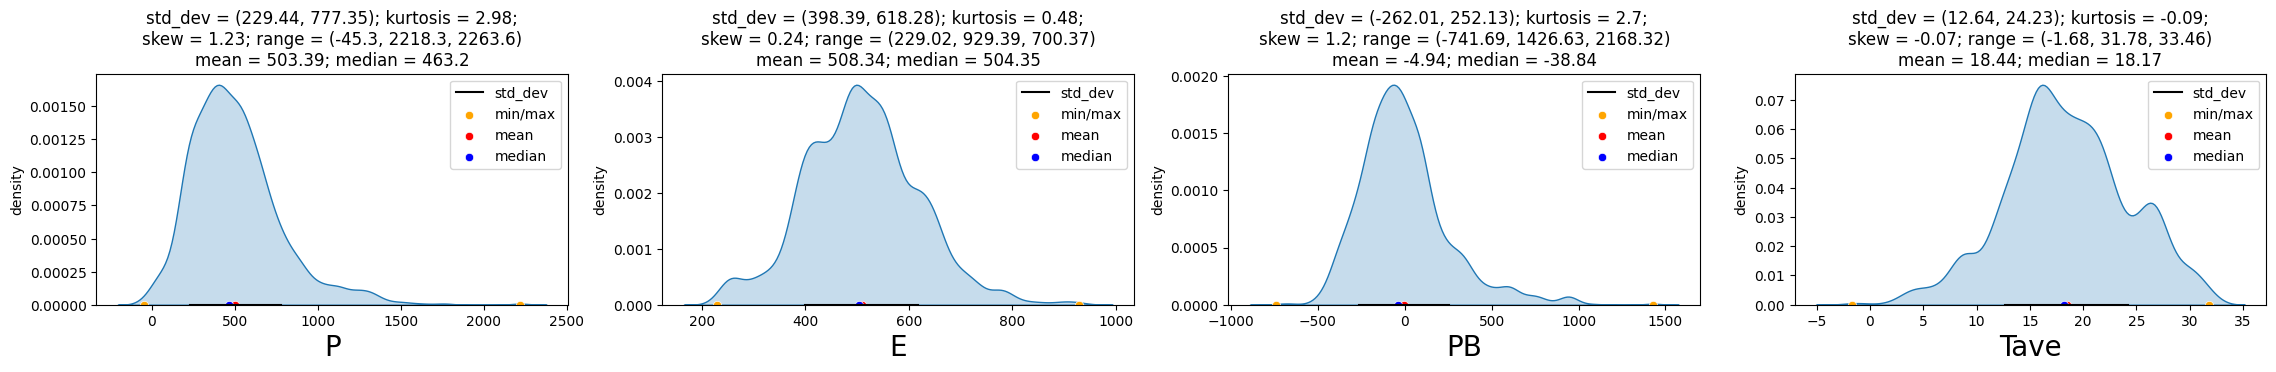

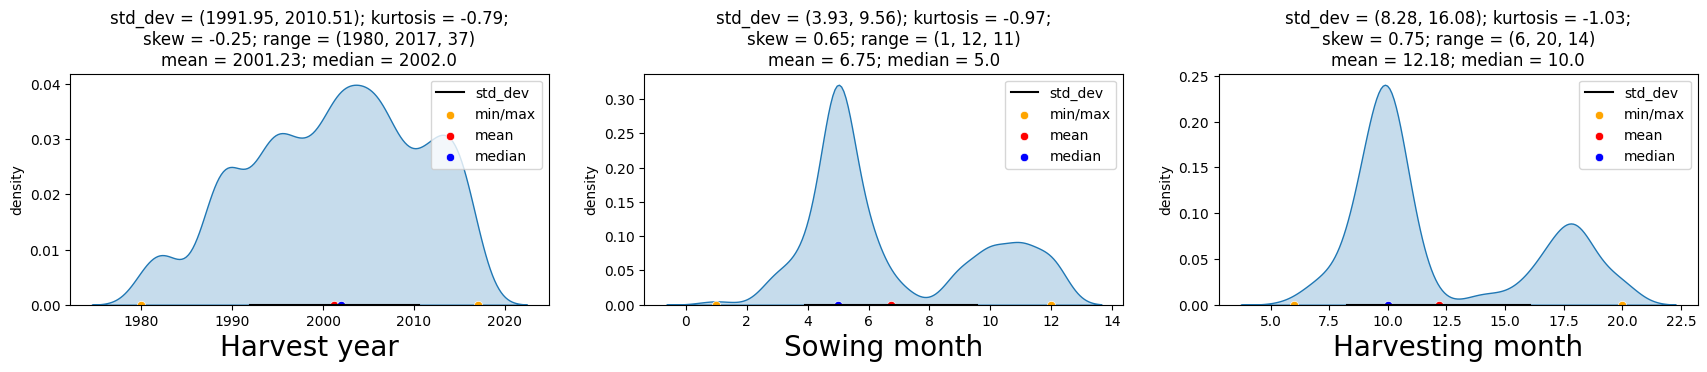

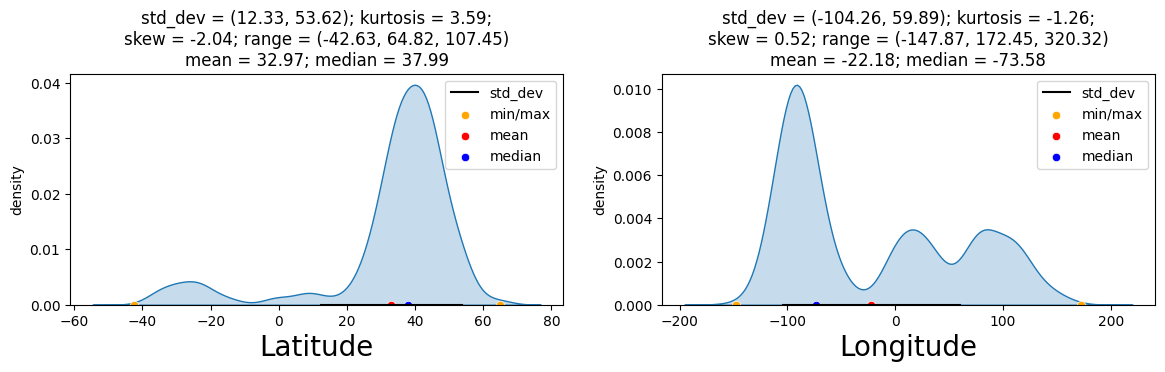

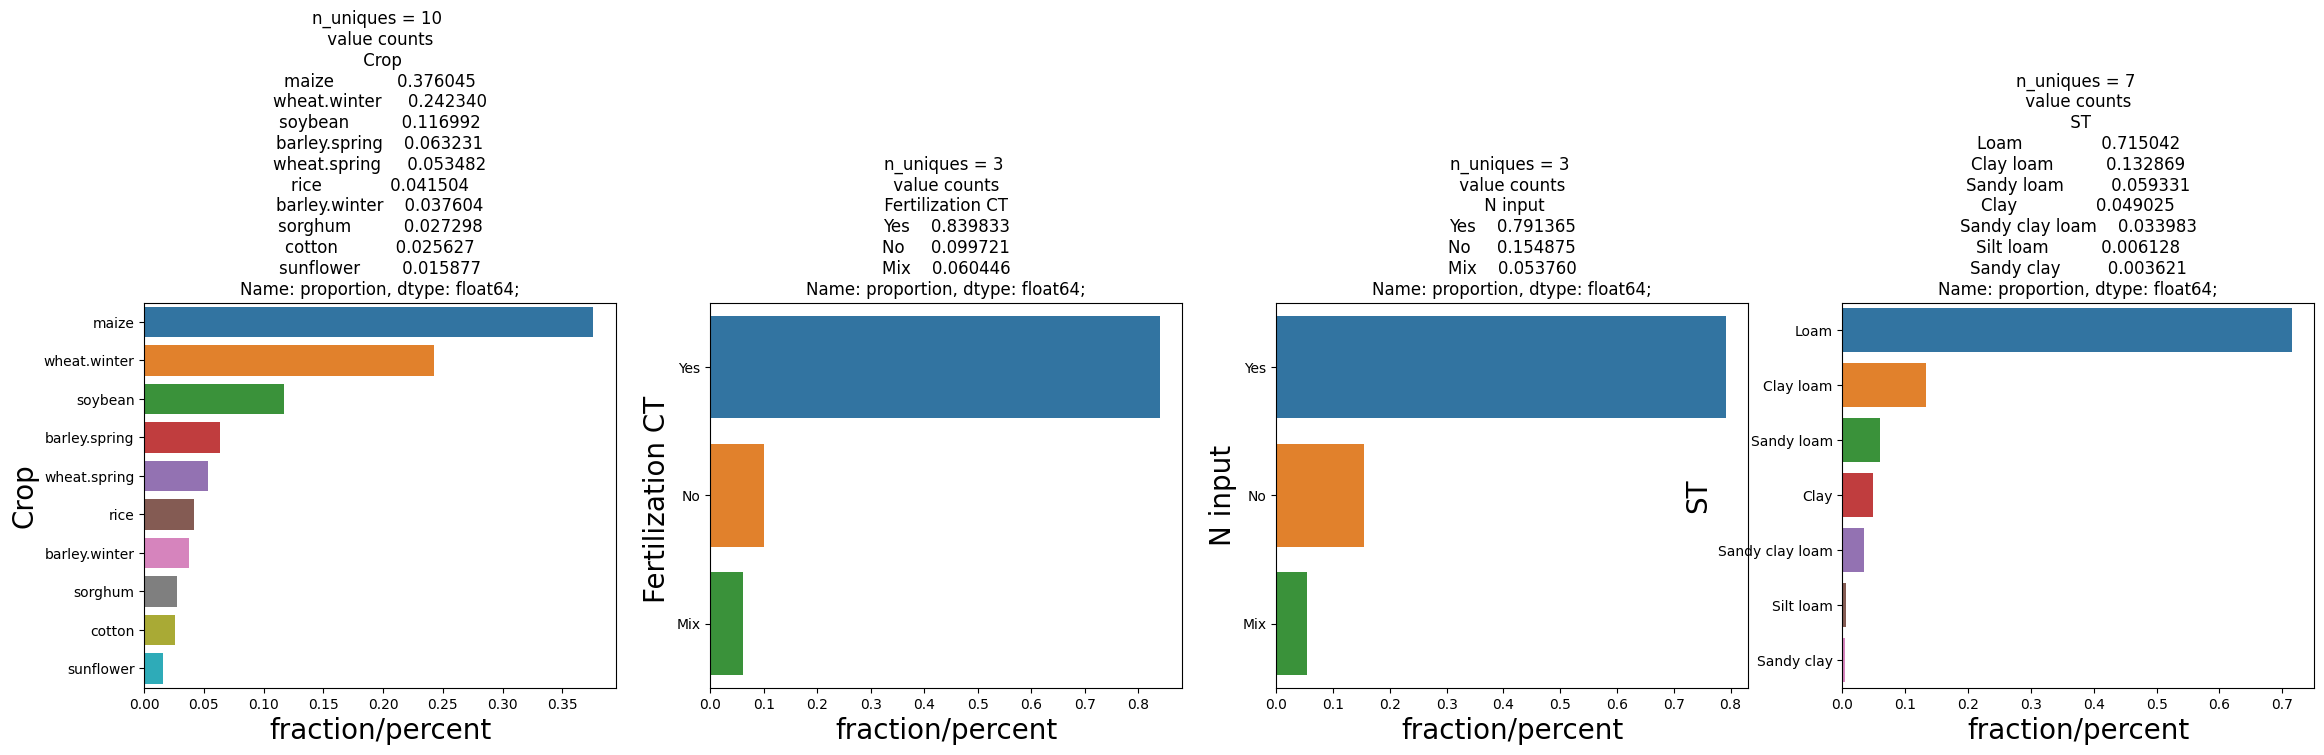

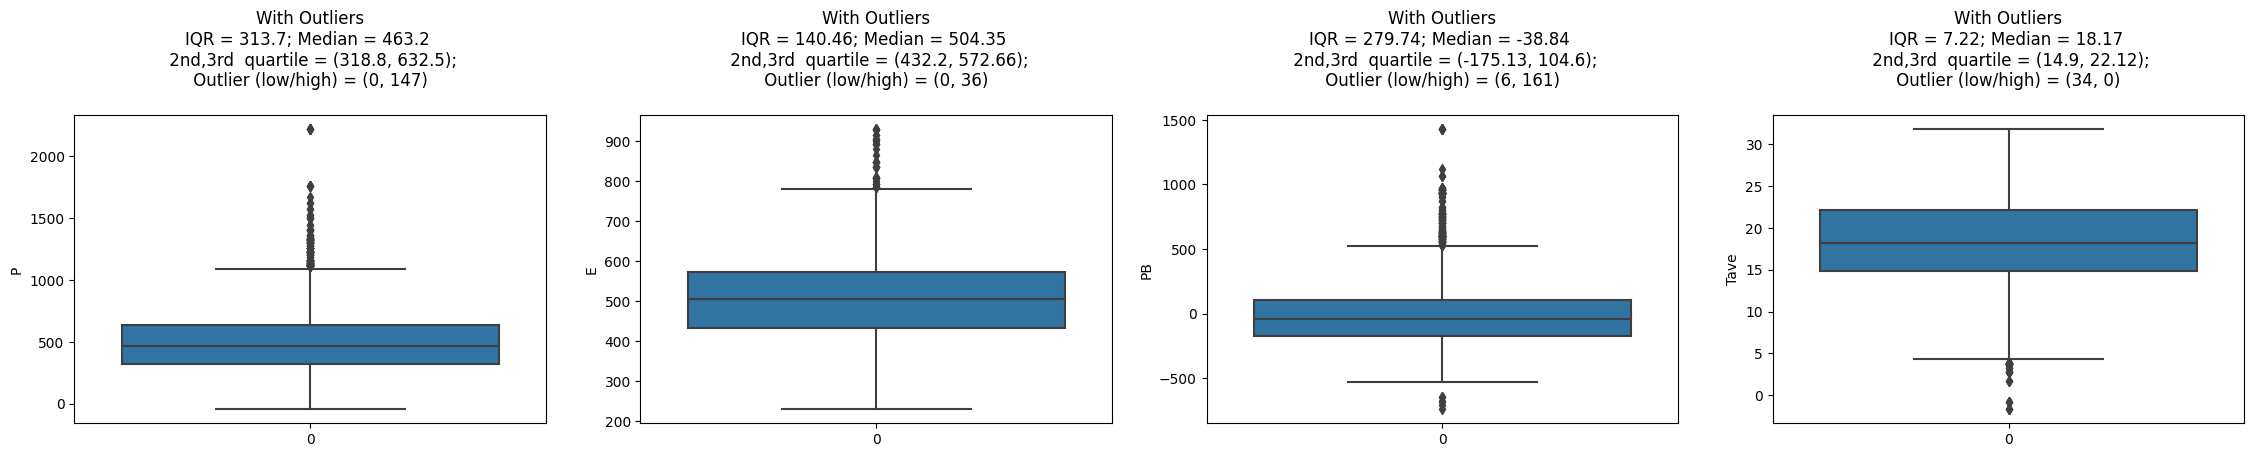

<Figure size 2800x400 with 0 Axes>

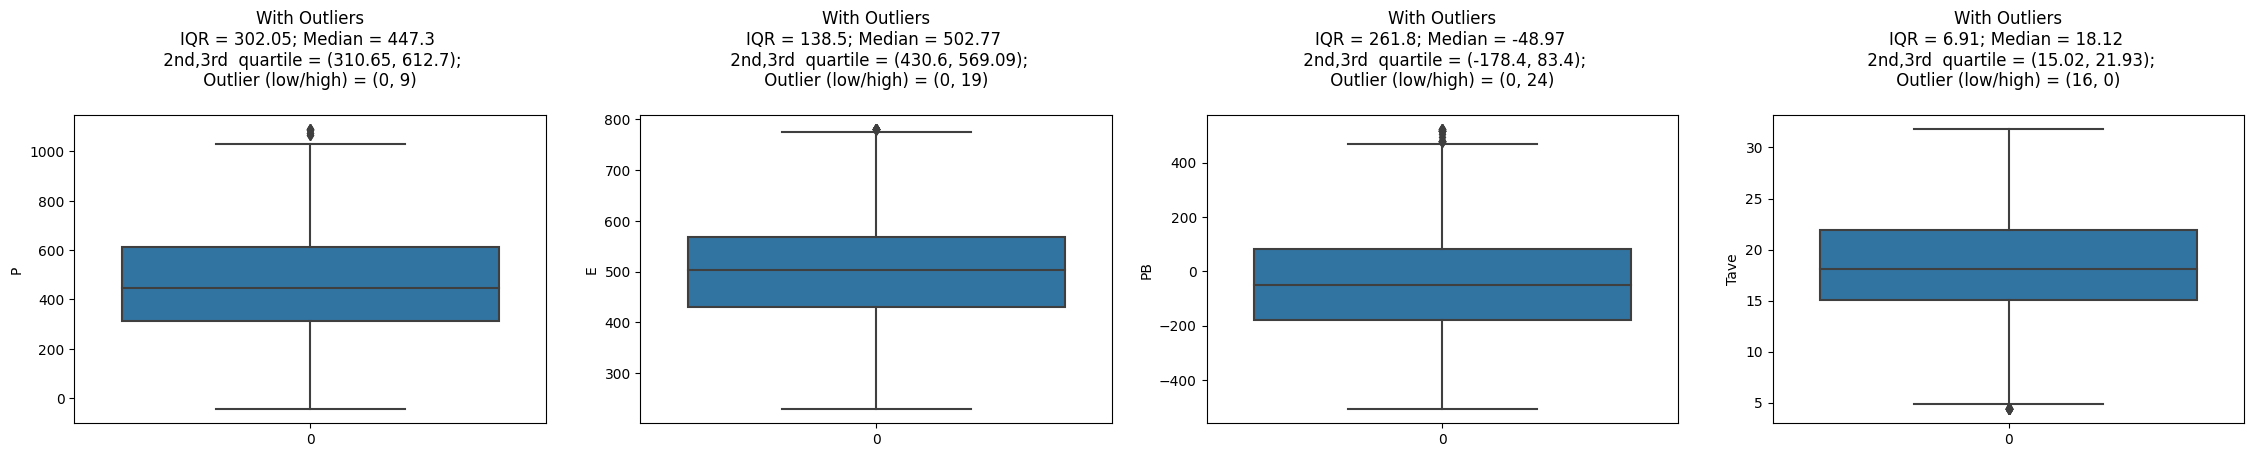

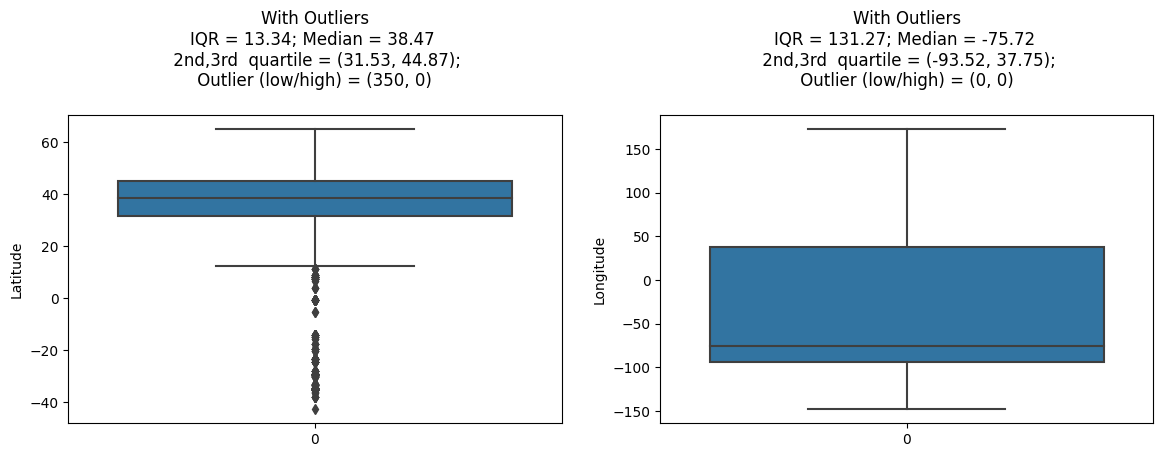

<Figure size 1400x400 with 0 Axes>

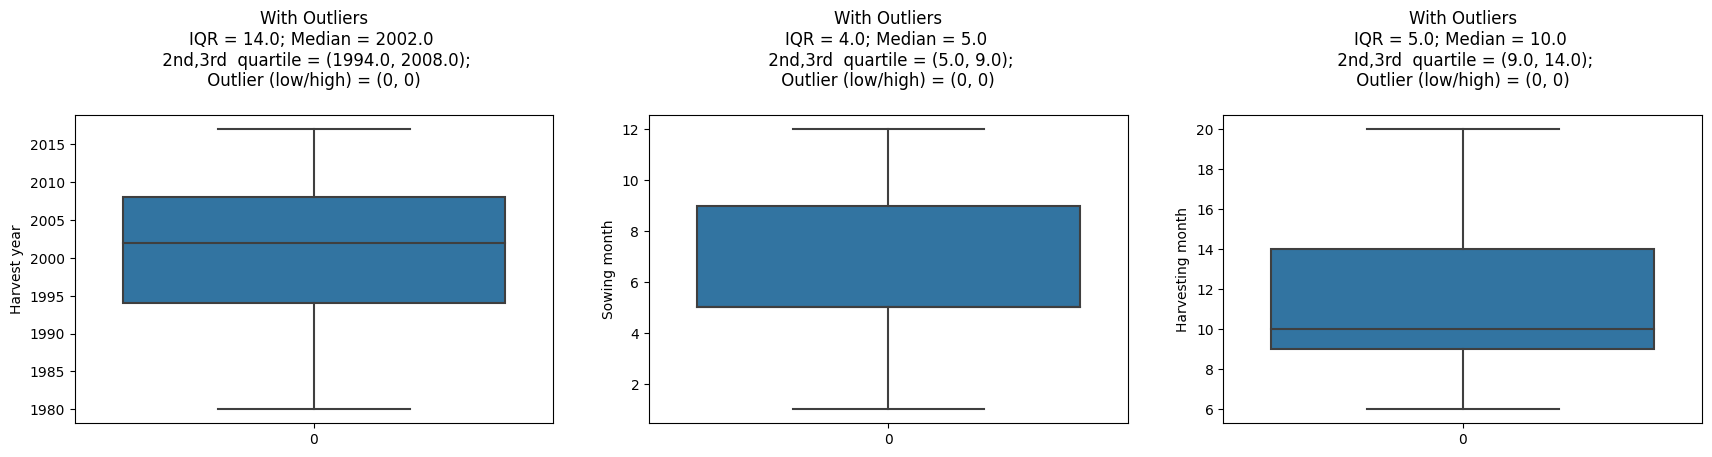

<Figure size 2100x400 with 0 Axes>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Filter out any warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/kaggle/input/try-try-try/final_ct.csv')

df.shape

df.isnull().sum()

df.dropna(inplace=True)

df.columns

df.dtypes

location = ['Latitude', 'Longitude']
grow_time = [ 'Harvest year', 'Sowing month','Harvesting month']
environmental = ['P', 'E', 'PB', 'Tave']
categorical_cols = ['Crop', 'Fertilization CT ', 'N input', 'ST']


def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = [mean-st_dev, mean+st_dev]

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x = points, y = [0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
    sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

UVA_numeric(df, environmental)

UVA_numeric(df, grow_time)

UVA_numeric(df, location)

import seaborn as sns
import matplotlib.pyplot as plt

def UVA_category(data, var_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize=(7*size, 5), dpi=100)

    # for every variable
    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

        # Plotting the variable with every information
        plt.subplot(1, size, j + 1)
        sns.barplot(x=norm_count, y=norm_count.index, order=norm_count.index)
        plt.xlabel('fraction/percent', fontsize=20)
        plt.ylabel('{}'.format(i), fontsize=20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni, norm_count))

    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame and 'var_group' is a list of column names
# UVA_category(data, var_group)

UVA_category(df, categorical_cols)



# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))


UVA_outlier(df, environmental)

trimmed_df = df.copy()

import matplotlib.pyplot as plt

def UVA_outlier_remove(data, var_group, trimmed_df):
    size = len(var_group)
    plt.figure(figsize=(7*size, 4), dpi=100)
    for i in var_group:
        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = quant25 - (1.5 * IQR)
        whis_high = quant75 + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i] > whis_high])
        outlier_low = len(data[i][data[i] < whis_low])

        # Filtering outliers from trimmed_df
        trimmed_df = trimmed_df[(trimmed_df[i] < whis_high) & (trimmed_df[i] > whis_low)]
    return trimmed_df


trimmed_df = UVA_outlier_remove(df, environmental, trimmed_df)

trimmed_df.shape

df.shape

UVA_outlier(trimmed_df, environmental)

UVA_outlier(trimmed_df, location)

trimmed_df = UVA_outlier_remove(trimmed_df, location, trimmed_df)

UVA_outlier(trimmed_df, grow_time)

trimmed_df = UVA_outlier_remove(trimmed_df, grow_time, trimmed_df)

In [60]:
target = ['Yield of CT']
df = trimmed_df
df.rename(columns={'Yield of CT': 'Yield'}, inplace=True)
df.shape
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns)
one_hot_encoded_df.dtypes
SEED = 42

# Selecting features (X) and target (y)
# Extracting features (X)
predictorVars = one_hot_encoded_df.drop(columns=['Yield'])
# Extracting target variable (y)
targetVar = one_hot_encoded_df['Yield']

# Splitting the dataset into train and test sets (80% train, 20% test)
X_train,X_test,Y_train,Y_test = train_test_split(predictorVars, targetVar, test_size=0.2, random_state=SEED)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
target = ['Yield of CT']
df = trimmed_df
df.rename(columns={'Yield of CT': 'Yield'}, inplace=True)
df.shape
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns)
one_hot_encoded_df.dtypes
SEED = 50

# Selecting features (X) and target (y)
# Extracting features (X)
predictorVars = one_hot_encoded_df.drop(columns=['Yield'])
# Extracting target variable (y)
targetVar = one_hot_encoded_df['Yield']

# Splitting the dataset into train and test sets (80% train, 20% test)
X_train,X_test,Y_train,Y_test = train_test_split(predictorVars, targetVar, test_size=0.2, random_state=SEED)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
def plot_predictions_vs_truevals(predictions,y_test):    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', label='Predictions vs True Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Predictions vs True Values')
    plt.legend()
    plt.grid(True)
    plt.show()

In [63]:
def calculate_r2_score(actual_values, predicted_values):
    """
    Calculate the R-squared (R2) score given actual and predicted values.

    Parameters:
    actual_values (list or numpy array): Actual values of the dependent variable.
    predicted_values (list or numpy array): Predicted values of the dependent variable.

    Returns:
    float: The R-squared (R2) score.
    """
    import numpy as np

    # Convert inputs to numpy arrays if they are not already
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Calculate the mean of actual values
    mean_actual = np.mean(actual_values)

    # Calculate the total sum of squares (TSS)
    tss = np.sum((actual_values - mean_actual) ** 2)

    # Calculate the residual sum of squares (RSS)
    rss = np.sum((actual_values - predicted_values) ** 2)

    # Calculate R2 score
    r2_score = 1 - (rss / tss)

    return r2_score


## GBM

In [64]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [65]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1, 
                                random_state = SEED,
                                max_features = 20)

# Fit to training set
gbr.fit(X_train, Y_train)
 
# Predict on test set
predictions = gbr.predict(X_test)

# test set RMSE
test_rmse = mean_squared_error(Y_test, predictions) ** (1 / 2)
 
# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))

# test set R2
test_r2 = calculate_r2_score(Y_test, predictions)

# Print R2
print('R2 Score : {:.2f}' .format(test_r2))

Root mean Square error: 2366.51
R2 Score : 0.58


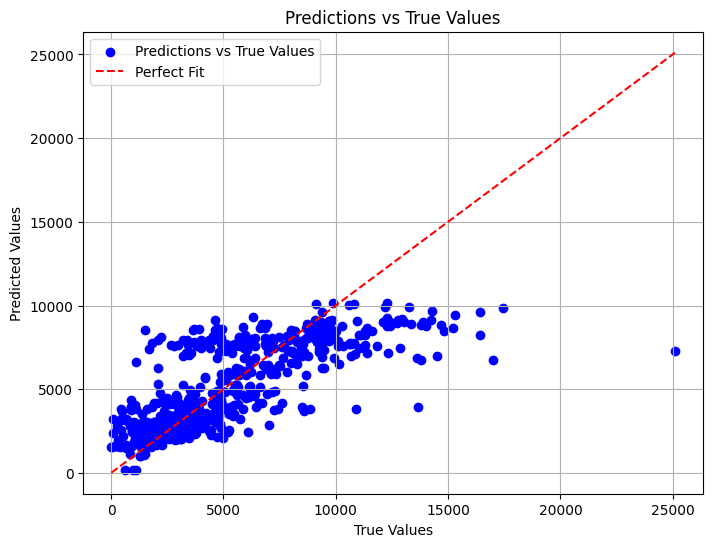

In [66]:
plot_predictions_vs_truevals(predictions,Y_test)

## XG Boost

In [67]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Hyperparameter Tuning

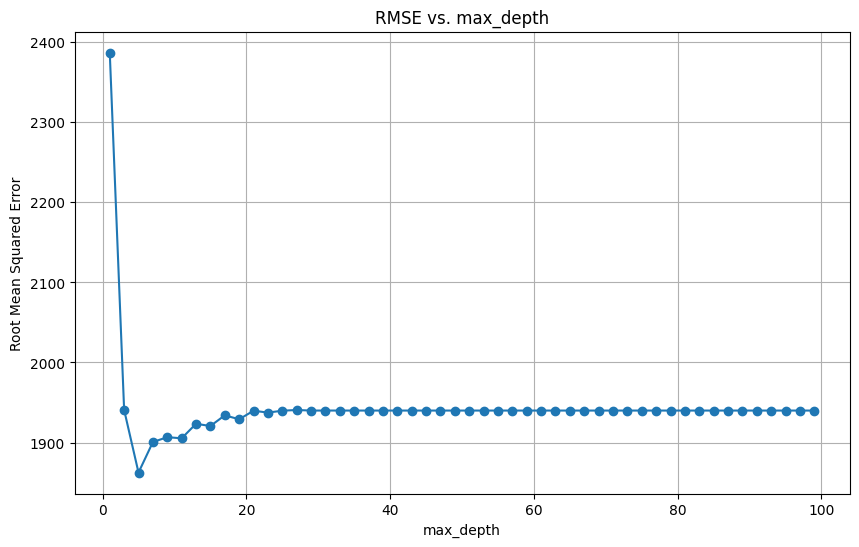

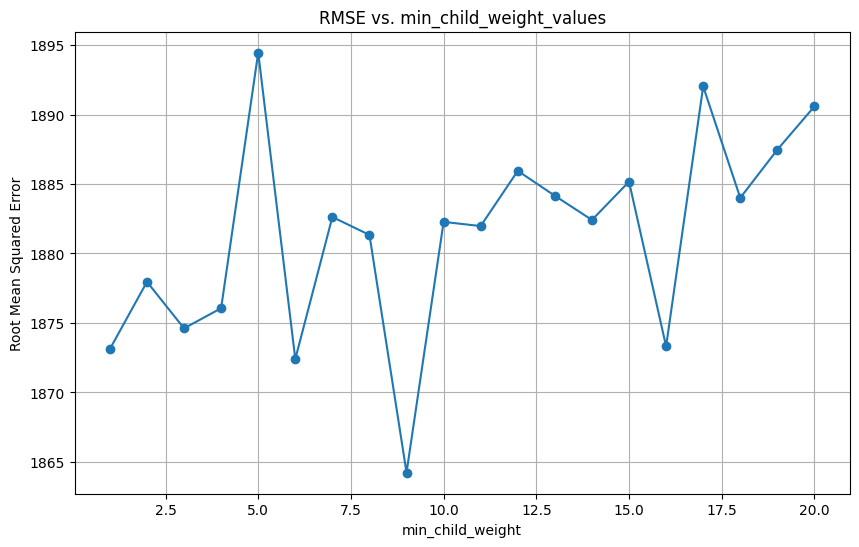

In [87]:
depths = range(1, 101, 2)  # max_depth values from 1 to 100 with step size 2
rmse_values = []

# Iterate over different max_depth values
for depth in depths:
    # Initialize DecisionTreeRegressor
    model = xgb.XGBRegressor(objective='reg:squarederror',max_depth=depth)
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Append RMSE to list
    rmse_values.append(np.sqrt(-scores.mean()))

# Plot RMSE values against max_depth
plt.figure(figsize=(10, 6))
plt.plot(depths, rmse_values, marker='o', linestyle='-')
plt.title('RMSE vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()

min_child_weight_values = range(1, 21)  # Example range for min_child_weight
rmse_values_min_child_weight = []

# # Iterate over different min_child_weight_values
for child_weight in min_child_weight_values:
    model = xgb.XGBRegressor(objective='reg:squarederror',min_child_weight = child_weight)
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Append RMSE to list
    rmse_values_min_child_weight.append(np.sqrt(-scores.mean()))

# Plot RMSE values against min_samples_leaf
plt.figure(figsize=(10, 6))
plt.plot(min_child_weight_values, rmse_values_min_child_weight, marker='o', linestyle='-')
plt.title('RMSE vs. min_child_weight_values')
plt.xlabel('min_child_weight')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()


In [88]:
max_depth_indices = np.argsort(rmse_values)[:5]
min_child_weight_indices = np.argsort(rmse_values_min_child_weight)[:5]
# Print the indices for which minimum RMSE values are AAAA
print("Indices for minimum RMSE values for max_depth:", max_depth_indices)
print("Indices for minimum RMSE values for min_child_weight:", min_child_weight_indices)

max_depth_values = [depths[i] for i in max_depth_indices[:5]]
print("Values for max_depth with minimum RMSE:", max_depth_values)

min_child_weights = [min_child_weight_values[i] for i in min_child_weight_indices[:5]]
print("Values for min_child_weight with minimum RMSE:", min_child_weights)


Indices for minimum RMSE values for max_depth: [2 3 5 4 7]
Indices for minimum RMSE values for min_child_weight: [ 8  5  0 15  2]
Values for max_depth with minimum RMSE: [5, 7, 11, 9, 15]
Values for min_child_weight with minimum RMSE: [9, 6, 1, 16, 3]


In [69]:
from sklearn.model_selection import GridSearchCV
model = xgb.XGBRegressor()

In [89]:
params = {
    'max_depth' : max_depth_values,
    'min_child_weight' : min_child_weights
}

In [90]:
grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=20, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [5, 7, 11, 9, 15],
                         'min_child_weight': [9, 6, 1, 16, 3]},
             scoring='neg_mean_squared_error', verbose=1)

In [91]:
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Estimator:", best_estimator)
print("Best Parameters:", best_params)

Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Best Parameters: {'max_depth': 5, 'min_child_weight': 1}


In [92]:
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1631.131865800921


In [93]:
# test_rmse = mean_squared_error(Y_test, predictions) ** (1 / 2)
 
# # Print rmse
# print('Root mean Square error: {:.2f}'.format(test_rmse))

# # test set R2
# test_r2 = calculate_r2_score(Y_test, predictions)

# # Print R2
# print('R2 Score : {:.2f}' .format(test_r2))

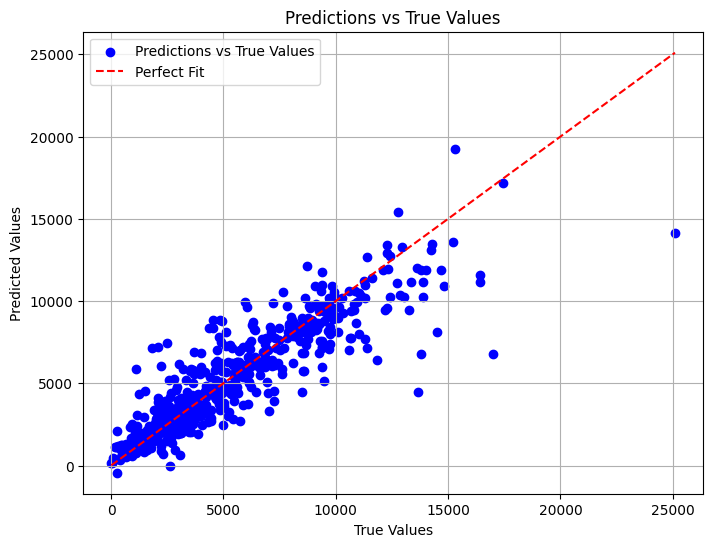

In [94]:
plot_predictions_vs_truevals(y_pred,Y_test)

## Looking at Feature Importance

In [95]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Assuming X_train is a NumPy array and you don't have access to column names directly
# Fit the decision tree model
model.fit(X_train, Y_train)

# Get feature importances
importances = model.feature_importances_

# Create a pandas Series with feature importances using numerical indices
num_features = X_train.shape[1]  # Number of features
feature_importance_series = pd.Series(importances, index=range(num_features))

# Sort the feature importances in descending order
sorted_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print(sorted_importances)

12    0.567364
18    0.069090
9     0.039027
11    0.038010
20    0.036993
13    0.030940
29    0.029606
1     0.024173
15    0.018866
24    0.018291
2     0.014720
0     0.014513
4     0.013772
23    0.013087
3     0.012102
6     0.008997
14    0.007908
7     0.007897
8     0.006363
5     0.005135
26    0.005041
27    0.004306
10    0.003202
21    0.003136
25    0.002658
19    0.001464
22    0.001273
28    0.000946
16    0.000755
17    0.000363
30    0.000000
dtype: float32


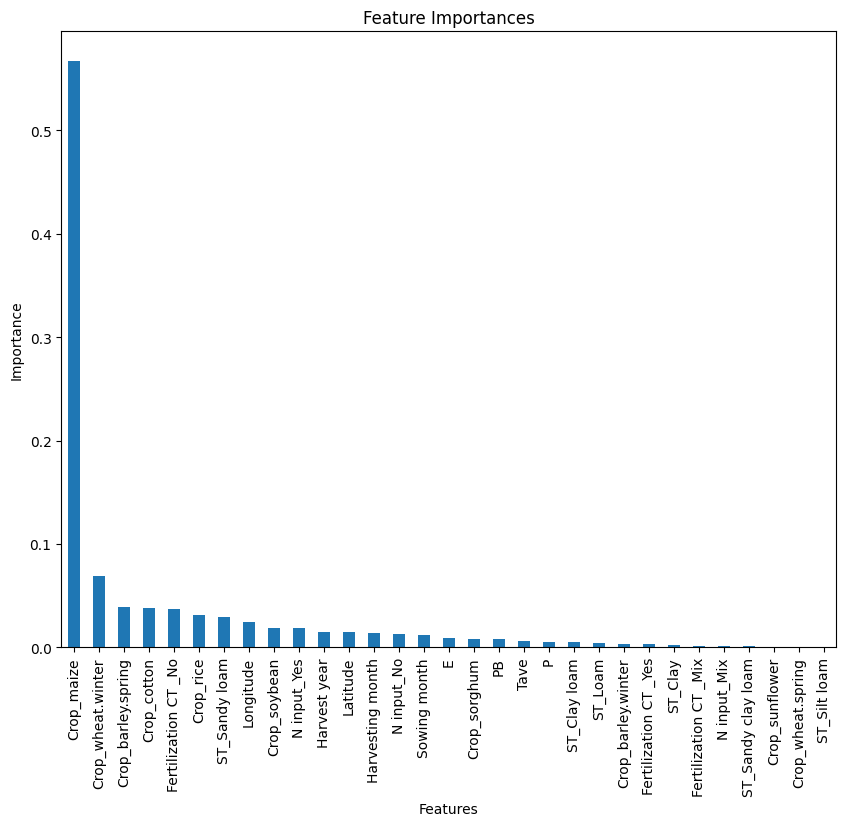

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already calculated feature importances and stored them in a pandas Series
feature_importances = pd.Series(model.feature_importances_, index=predictorVars.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## XG Boost from scratch

In [97]:
import math
from collections import defaultdict

In [98]:
class XGBoostModel():
    '''XGBoost from Scratch
    '''
    
    def __init__(self, params, random_seed=None):
        self.params = defaultdict(lambda: None, params)
        self.subsample = self.params['subsample'] \
            if self.params['subsample'] else 1.0
        self.learning_rate = self.params['learning_rate'] \
            if self.params['learning_rate'] else 0.3
        self.base_prediction = self.params['base_score'] \
            if self.params['base_score'] else 0.5
        self.max_depth = self.params['max_depth'] \
            if self.params['max_depth'] else 5
        self.rng = np.random.default_rng(seed=random_seed)
                
    def fit(self, X, y, objective, num_boost_round, verbose=False):
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        self.boosters = []
        for i in range(num_boost_round):
            gradients = objective.gradient(y, current_predictions)
            hessians = objective.hessian(y, current_predictions)
            sample_idxs = None if self.subsample == 1.0 \
                else self.rng.choice(len(y), 
                                     size=math.floor(self.subsample*len(y)), 
                                     replace=False)
            booster = TreeBooster(X, gradients, hessians, 
                                  self.params, self.max_depth, sample_idxs)
            current_predictions += self.learning_rate * booster.predict(X)
            self.boosters.append(booster)
            if verbose: 
                print(f'[{i}] train loss = {objective.loss(y, current_predictions)}')
            
    def predict(self, X):
        return (self.base_prediction + self.learning_rate 
                * np.sum([booster.predict(X) for booster in self.boosters], axis=0))
    
class TreeBooster():
 
    def __init__(self, X, g, h, params, max_depth, idxs=None):
        self.params = params
        self.max_depth = max_depth
        assert self.max_depth >= 0, 'max_depth must be nonnegative'
        self.min_child_weight = params['min_child_weight'] \
            if params['min_child_weight'] else 1.0
        self.reg_lambda = params['reg_lambda'] if params['reg_lambda'] else 1.0
        self.gamma = params['gamma'] if params['gamma'] else 0.0
        self.colsample_bynode = params['colsample_bynode'] \
            if params['colsample_bynode'] else 1.0
        if isinstance(g, pd.Series): g = g.values
        if isinstance(h, pd.Series): h = h.values
        if idxs is None: idxs = np.arange(len(g))
        self.X, self.g, self.h, self.idxs = X, g, h, idxs
        self.n, self.c = len(idxs), X.shape[1]
        self.value = -g[idxs].sum() / (h[idxs].sum() + self.reg_lambda) # Eq (5)
        self.best_score_so_far = 0.
        if self.max_depth > 0:
            self._maybe_insert_child_nodes()

    def _maybe_insert_child_nodes(self):
        for i in range(self.c): self._find_better_split(i)
        if self.is_leaf: return
        x = self.X[self.idxs,self.split_feature_idx]
        left_idx = np.nonzero(x <= self.threshold)[0]
        right_idx = np.nonzero(x > self.threshold)[0]
        self.left = TreeBooster(self.X, self.g, self.h, self.params, 
                                self.max_depth - 1, self.idxs[left_idx])
        self.right = TreeBooster(self.X, self.g, self.h, self.params, 
                                 self.max_depth - 1, self.idxs[right_idx])

    @property
    def is_leaf(self): return self.best_score_so_far == 0.
    
    def _find_better_split(self, feature_idx):
        x = self.X[self.idxs, feature_idx]
        g, h = self.g[self.idxs], self.h[self.idxs]
        sort_idx = np.argsort(x)
        sort_g, sort_h, sort_x = g[sort_idx], h[sort_idx], x[sort_idx]
        sum_g, sum_h = g.sum(), h.sum()
        sum_g_right, sum_h_right = sum_g, sum_h
        sum_g_left, sum_h_left = 0., 0.

        for i in range(0, self.n - 1):
            g_i, h_i, x_i, x_i_next = sort_g[i], sort_h[i], sort_x[i], sort_x[i + 1]
            sum_g_left += g_i; sum_g_right -= g_i
            sum_h_left += h_i; sum_h_right -= h_i
            if sum_h_left < self.min_child_weight or x_i == x_i_next:continue
            if sum_h_right < self.min_child_weight: break

            gain = 0.5 * ((sum_g_left**2 / (sum_h_left + self.reg_lambda))
                            + (sum_g_right**2 / (sum_h_right + self.reg_lambda))
                            - (sum_g**2 / (sum_h + self.reg_lambda))
                            ) - self.gamma/2 # Eq(7) in the xgboost paper
            if gain > self.best_score_so_far: 
                self.split_feature_idx = feature_idx
                self.best_score_so_far = gain
                self.threshold = (x_i + x_i_next) / 2
                
    def predict(self, X):
        predictions = np.empty(len(X))
        for i in range(len(X)):
            predictions[i] = self._predict_row(X[i])
#         print(predictions.shape)
        return predictions

    def _predict_row(self, row):
        if self.is_leaf: 
            return self.value
        child = self.left if row[self.split_feature_idx] <= self.threshold \
            else self.right
        return child._predict_row(row)

In [99]:
class SquaredErrorObjective():
    def loss(self, y, pred): return np.mean((y - pred)**2)
    def gradient(self, y, pred): return pred - y
    def hessian(self, y, pred): return np.ones(len(y))

In [104]:
num_boost_round = 50

params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'reg_lambda': 1.5,
    'gamma': 0.0,
    'min_child_weight': 1,
    'base_score': 0.0,
    'tree_method': 'exact',
}

# train the from-scratch XGBoost model
model_scratch = XGBoostModel(params, random_seed=42)
Y_train_reshaped = np.squeeze(Y_train)
model_scratch.fit(X_train, Y_train_reshaped, SquaredErrorObjective(), num_boost_round)

In [105]:
pred_scratch = model_scratch.predict(X_test)

In [106]:
# print(f'scratch score: {SquaredErrorObjective().loss(y_test, pred_scratch)**(0.5)}')

test_rmse = mean_squared_error(Y_test, pred_scratch) ** (1 / 2)
 
# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))

# test set R2
test_r2 = calculate_r2_score(Y_test, pred_scratch)

# Print R2
print('R2 Score : {:.2f}' .format(test_r2))

Root mean Square error: 1888.92
R2 Score : 0.73


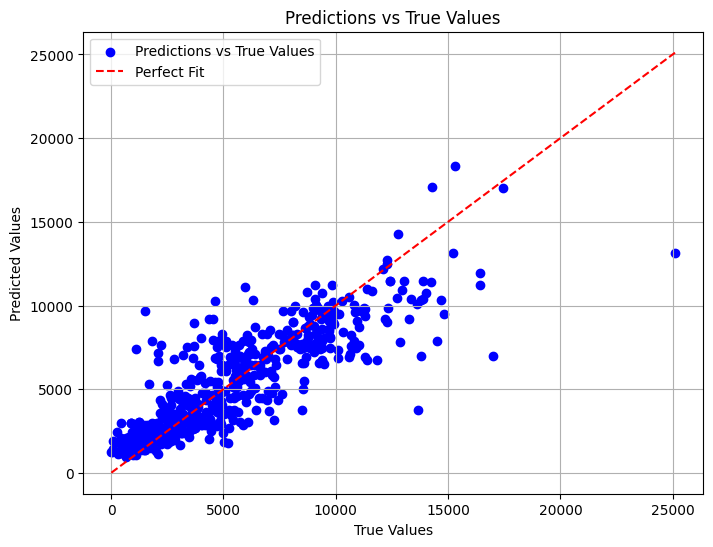

In [107]:
plot_predictions_vs_truevals(pred_scratch,Y_test)